In [4]:
import network_generator as ng
import network_analysis as na

import igraph
#para la estética de los gráifcos
visual_style = {}
visual_style["bbox"] = (300, 300)
visual_style["vertex_frame_width"] = 0
visual_style["edge_width"] = 0.02

import matplotlib.pyplot as plt
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern} \usepackage{amssymb} \usepackage{amsmath}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 16,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

import warnings
warnings.filterwarnings('ignore')

# Generamos una red PS

In [5]:
PS_Network = ng.Network()
PS_Network.generatePSNetwork(N=500, avg_k=14, gamma=2.5, Temp=0.2, seed=1)

## Graficamos la red. Las coordenadas del modelo PS ya están contenidas en el objeto igraph.Graph contenido en PS_Network.

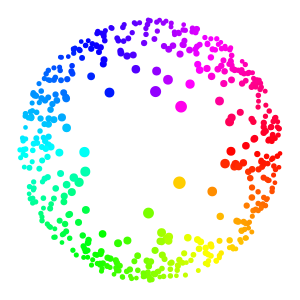

In [6]:
igraph.plot(PS_Network.graph, **visual_style)

## Graficamos la distribución de grados de la red

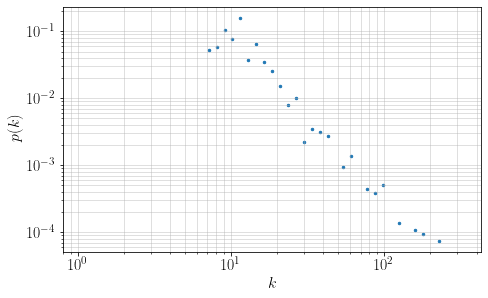

In [7]:
fig = na.graph_degree_plot(PS_Network.graph, logScale=True, legend=False)

# Aplicamos LaBNE

In [8]:
PS_Network_LaBNE = ng.generateLaBNE(network=PS_Network)

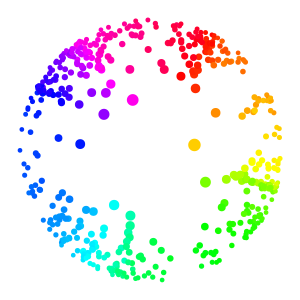

In [9]:
igraph.plot(PS_Network_LaBNE, **visual_style)

## Graficamos los ángulos inferidos vs. reales

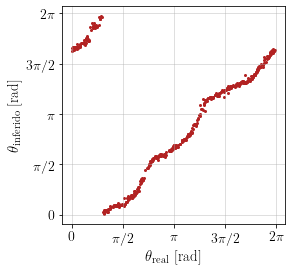

In [10]:
fig, ax = na.inferred_angles(PS_graph=PS_Network.graph, LaBNE_graph=PS_Network_LaBNE)

# Aplicamos predicción de enlaces con un train set

In [11]:
PR = na.precision_recall_train_set(graph=PS_Network.graph, metric='LaBNE', test_size=0.33, random_state=50, step=1, debug_print_flag=False)

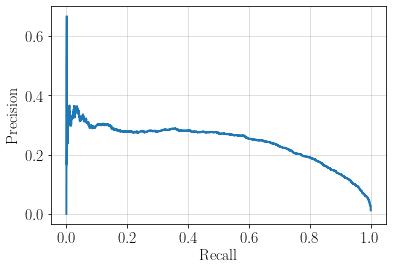

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

ax.grid(alpha=0.5)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

ax.plot(PR['recall'], PR['precision'], linewidth=2)